In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('/Users/baptistecarbillet/Documents/MachineLearning1/winequality-white.csv',sep=';')
df['y'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)
df = df.drop('quality',axis=1)

X,y = np.array(df.drop('y',axis=1)),np.array(df['y'])

#Normalize X
X = (X - np.mean(X,axis=0))/np.std(X,axis=0)

from sklearn.model_selection import train_test_split

random_state = 75 #Paris

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=random_state)

In [3]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=12,weights='distance',algorithm='auto',p=2,metric='minkowski')

from sklearn.model_selection import KFold, cross_validate
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True,random_state=random_state)

model = knn
scoring=('f1')

scores = cross_validate(model, X_train, y_train, cv=kf, scoring=scoring, return_train_score=True)

print("Train accuracy: %0.2f (+/- %0.2f)" % (scores['train_score'].mean(), scores['train_score'].std() * 2))
print("Test accuracy: %0.2f (+/- %0.2f)" % (scores['test_score'].mean(), scores['test_score'].std() * 2))

Train accuracy: 1.00 (+/- 0.00)
Test accuracy: 0.65 (+/- 0.05)


In [4]:
X_train.shape

(3918, 11)

In [5]:
#### Valdiation curves for KNN : n_neighbors
from sklearn.model_selection import cross_validate


neighbors = np.linspace(1,3000,300)
train_acc = []
test_acc = []
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=int(n),weights='distance',algorithm='auto',p=2,metric='minkowski')
    scores = cross_validate(knn, X_train, y_train, cv=kf, scoring=scoring, return_train_score=True)
    train_acc.append(scores['train_score'].mean())
    test_acc.append(scores['test_score'].mean())
    

KeyboardInterrupt: 

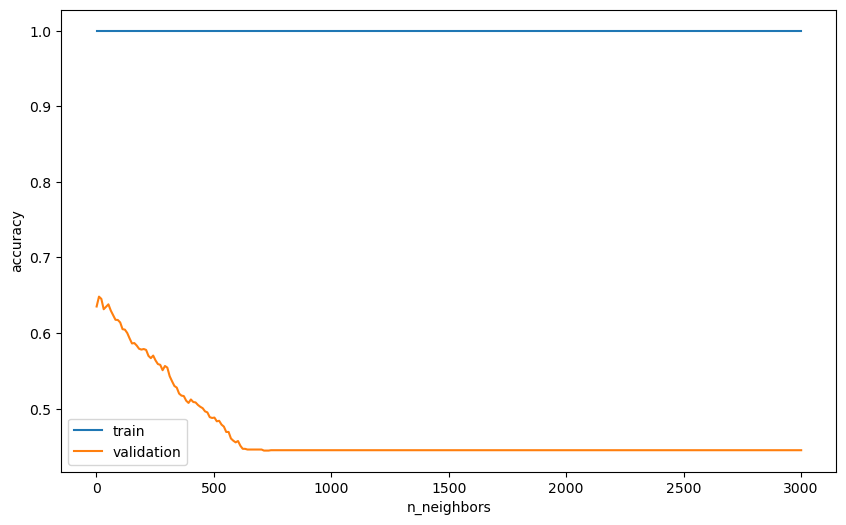

In [ ]:
#plot curve
plt.figure(figsize=(10,6))
plt.plot(neighbors,train_acc,label='train')
plt.plot(neighbors,test_acc,label='validation')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend()

In [ ]:
X_train.shape[0] * 0.8 * 0.2
#Approximately 626 

626.8800000000001

In [6]:
#### Valdiation curves for KNN : n_neighbors
from sklearn.model_selection import cross_validate


neighbors = np.linspace(1,300,30)
train_acc_un = []
test_acc_un = []
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=int(n),weights='uniform',algorithm='auto',p=2,metric='minkowski')
    scores = cross_validate(knn, X_train, y_train, cv=kf, scoring=scoring, return_train_score=True)
    train_acc_un.append(scores['train_score'].mean())
    test_acc_un.append(scores['test_score'].mean())

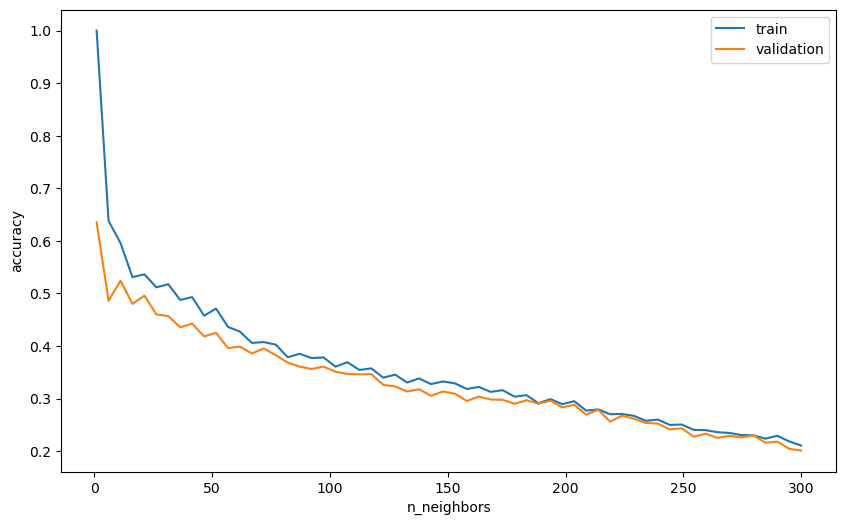

In [11]:
#### Valdiation curves for KNN : n_neighbors
plt.figure(figsize=(10,6))
plt.plot(neighbors,train_acc_un,label='train')
plt.plot(neighbors,test_acc_un,label='validation')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend()


## Grid search

In [39]:

knn_param_grid = {
    'n_neighbors': np.floor(np.linspace(1,50, 50)).astype(int),
    
    'weights': ['uniform','distance'],
    'p' : [1,2,3]
}

knn_clf = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
knn_grid_search = GridSearchCV(
    estimator=knn_clf,
    param_grid=knn_param_grid,
    scoring='f1',
    return_train_score=True,
    cv=4,
    verbose=10,
    n_jobs=-1)

knn_grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 300 candidates, totalling 1200 fits
[CV 1/4; 1/300] START n_neighbors=1, p=1, weights=uniform.......................
[CV 2/4; 1/300] START n_neighbors=1, p=1, weights=uniform.......................
[CV 3/4; 1/300] START n_neighbors=1, p=1, weights=uniform.......................
[CV 4/4; 1/300] START n_neighbors=1, p=1, weights=uniform.......................
[CV 1/4; 2/300] START n_neighbors=1, p=1, weights=distance......................
[CV 2/4; 2/300] START n_neighbors=1, p=1, weights=distance......................
[CV 1/4; 2/300] END n_neighbors=1, p=1, weights=distance;, score=(train=1.000, test=0.615) total time=   0.0s
[CV 3/4; 2/300] START n_neighbors=1, p=1, weights=distance......................
[CV 1/4; 1/300] END n_neighbors=1, p=1, weights=uniform;, score=(train=1.000, test=0.615) total time=   0.0s
[CV 4/4; 2/300] START n_neighbors=1, p=1, weights=distance......................
[CV 1/4; 3/300] START n_neighbors=1, p=2, weights=uniform............

GridSearchCV(cv=4, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
                         'p': [1, 2, 3], 'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='f1', verbose=10)

In [42]:
knn_grid_search.best_params_

{'n_neighbors': 9, 'p': 2, 'weights': 'distance'}

In [40]:
knn_grid_search.best_score_

0.649862501840488

### Iteratively find the best feature

In [44]:
import itertools
mean_train_score = []
mean_test_score = []


for i in range(13):
    
    

    #
    
    if i == 0:
        ind1 = 10
        which = np.array(list(itertools.combinations(range(11), 1)))
        grid = np.zeros((len(which), 11), dtype="int8")

    # Magic
        grid[np.arange(len(which))[None].T, which] = 1
        metric_param = []

        for w in grid:
           
        #    w[ind1] = 1
            #if np.sum(w) != i+1:
                metric_param.append({'w' : w})
    else:
        
            
        ind1 = np.argwhere(knn_grid_search.best_estimator_.metric_params['w'] == 1)

        ind1 = ind1.flatten()
        print('Col : {}'.format(df.columns[ind1]))
        
        which = np.array(list(itertools.combinations(range(11), 1)))
        grid = np.zeros((len(which), 11), dtype="int8")

    # Magic
        grid[np.arange(len(which))[None].T, which] = 1
        metric_param = []

        for w in grid:
            w[ind1] = 1
            if np.sum(w) != i:
                metric_param.append({'w' : w})
            
        

    knn_param_grid = {
        'metric_params' : metric_param
        
    }
   
    knn_weight = KNeighborsClassifier(n_neighbors= 9, weights='distance',algorithm='auto',p=2,metric='minkowski')
    from sklearn.model_selection import GridSearchCV
    knn_grid_search = GridSearchCV(
        estimator=knn_weight,
        param_grid=knn_param_grid,
        scoring='f1',
        return_train_score=True,
        cv=4,
        verbose=0,
        n_jobs=-1,
        )

    knn_grid_search.fit(X_train, y_train)
    
    #Add mean train score of best params and mean test score of best params
    
    mean_train_score.append(knn_grid_search.cv_results_['mean_train_score'][knn_grid_search.best_index_])
    mean_test_score.append(knn_grid_search.cv_results_['mean_test_score'][knn_grid_search.best_index_])
    
    #print mean_test_score
    print('Best score : {}'.format(knn_grid_search.best_score_))

    

Best score : 0.35522990052635145
Col : Index(['density'], dtype='object')
Best score : 0.5592270268830856
Col : Index(['residual sugar', 'density'], dtype='object')
Best score : 0.6017200803781197
Col : Index(['residual sugar', 'density', 'pH'], dtype='object')
Best score : 0.6082278886932131
Col : Index(['volatile acidity', 'residual sugar', 'density', 'pH'], dtype='object')
Best score : 0.61401814953593
Col : Index(['volatile acidity', 'citric acid', 'residual sugar', 'density', 'pH'], dtype='object')
Best score : 0.6187950793993022
Col : Index(['volatile acidity', 'citric acid', 'residual sugar', 'density', 'pH',
       'alcohol'],
      dtype='object')
Best score : 0.6352364567718449
Col : Index(['volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
       'density', 'pH', 'alcohol'],
      dtype='object')
Best score : 0.656311698166622
Col : Index(['volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'density', 'pH', 'alcohol'

ValueError: Parameter grid for parameter 'metric_params' need to be a non-empty sequence, got: []

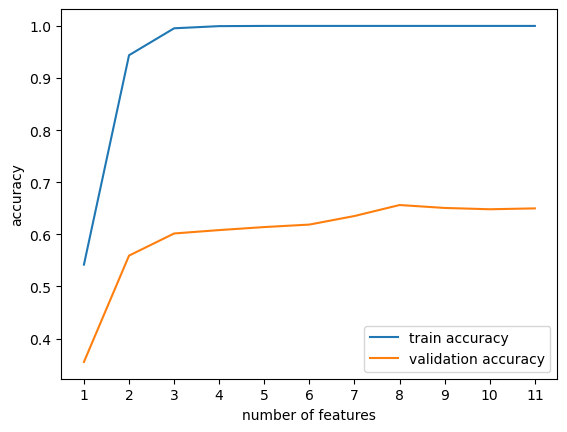

In [47]:
fig, ax = plt.subplots()

ax.plot([i for i in range(1,12)], mean_train_score, label='train accuracy')
ax.plot([i for i in range(1,12)], mean_test_score, label='validation accuracy')
ax.set_xlabel('number of features')
ax.set_ylabel('accuracy')
ax.set_xticks([i for i in range(1,12)])
ax.legend()

plt.show()

## Learning curbr

In [48]:
X_train_lc,X_val_lc,y_train_lc,y_val_lc = train_test_split(X_train,y_train,test_size=0.2,random_state=random_state)

model = KNeighborsClassifier(n_neighbors= 9, weights='distance',algorithm='auto',p=2,metric='minkowski')
#Select a sample of X_train, with the corresponding y_train
train_acc_lc = []
val_acc_lc = []

from sklearn.metrics import f1_score
for sample in np.linspace(0.01,0.99,98):
    X_train_sample,X_out_sample,y_train_sample,y_out_sample = train_test_split(X_train_lc,y_train_lc,test_size=float(1 - sample),random_state=random_state)
    
    
    model.fit(X_train_sample,y_train_sample)
    
    y_pred = model.predict(X_val_lc)
    #Train accuracy
    y_pred_train = model.predict(X_train_sample)
    train_acc_lc.append(f1_score(y_train_sample,y_pred_train))
    
    #Validation accuracy
    val_acc_lc.append(f1_score(y_val_lc,y_pred))

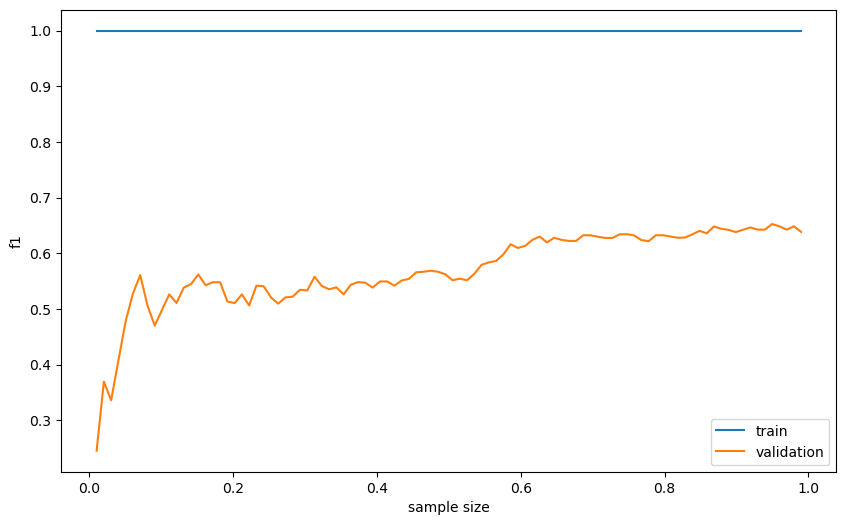

In [49]:
#Plot
plt.figure(figsize=(10,6))
plt.plot(np.linspace(0.01,0.99,98),train_acc_lc,label='train')
plt.plot(np.linspace(0.01,0.99,98),val_acc_lc,label='validation')
plt.xlabel('sample size')
plt.ylabel('f1')
plt.legend()

In [8]:
# Score on test set
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)


0.6612903225806451